# Note to reader! 

This can not be re-run to reproduce results without setting ngrok up on my local machine to expose the local PostgreSQL database.

However, one should be able to read the outputs from each cell and deduce how I performed each statistical test referenced in my thesis.

Plus, some plots for my thesis were produced in this notebook.

In [1]:
!pip install pingouin

     |████████████████████████████████| 183 kB 5.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 31.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=fd7114eb7ae328175ed0ffe5f9b43d41e257f944227f06cfa47094b0188597de
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=8262c87a11ea2abc10eef5378172d988739d6c71b4f244d308f2601de083b981
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [3]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

!git clone https://github.com/JamesCallanan/Grad-CAM.git

%cd /content/Grad-CAM

from MRIDetails import EXPERIMENT_MODE, disease_details, SEG_MASK_KEYS, get_segment_seg_maps, DISEASE_LABELS
from db_funcs import Experiment_Number, insert_search, insert_trial, get_all_trials_by_search_id, get_trial_uid_and_model_paths_with_no_test_accuracies, update_trial_with_test_metrics, get_experiment_test_metrics


database_connection_details = {
    'ngrok_host' : '0.tcp.ngrok.io',
    'ngrok_port' : '18866',
    'user' : 'james'
}


experiment_number = Experiment_Number.EXP_1_HEATMAP_LOSS.value
exp1_HEATMAP_results = get_experiment_test_metrics( experiment_number, database_connection_details)

experiment_number = Experiment_Number.EXP_1_NORMAL_LOSS.value
exp1_CCE_results = get_experiment_test_metrics( experiment_number, database_connection_details)

experiment_number = Experiment_Number.EXP_2_HEATMAP_LOSS.value
exp2_HEATMAP_results = get_experiment_test_metrics( experiment_number, database_connection_details)

experiment_number = Experiment_Number.EXP_2_NORMAL_LOSS.value
exp2_CCE_results = get_experiment_test_metrics( experiment_number, database_connection_details)

Cloning into 'Grad-CAM'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 138 (delta 76), reused 88 (delta 36), pack-reused 0
Receiving objects: 100% (138/138), 28.19 KiB | 5.64 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/Grad-CAM


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
import numpy as np


# Experiment 1:
exp11_heatmap_heart_overlaps = []
for trial in exp1_CCE_results:
  if trial['avg_NOR_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_NOR_fraction_of_hc_heatmap_in_heart']) and trial['avg_RV_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_RV_fraction_of_hc_heatmap_in_heart']) and trial['avg_HCM_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_HCM_fraction_of_hc_heatmap_in_heart']) and trial['avg_DCM_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_DCM_fraction_of_hc_heatmap_in_heart']):
    avg_trial_heatmap_heart_overlap = (trial['avg_NOR_fraction_of_hc_heatmap_in_heart'] + trial['avg_RV_fraction_of_hc_heatmap_in_heart'] + trial['avg_HCM_fraction_of_hc_heatmap_in_heart'] + trial['avg_DCM_fraction_of_hc_heatmap_in_heart'])/4
    exp11_heatmap_heart_overlaps.append(avg_trial_heatmap_heart_overlap)

print(len(exp11_heatmap_heart_overlaps))
print(np.mean(exp11_heatmap_heart_overlaps))


exp12_heatmap_heart_overlaps = []
for trial in exp1_HEATMAP_results:
  if trial['avg_NOR_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_NOR_fraction_of_hc_heatmap_in_heart']) and trial['avg_RV_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_RV_fraction_of_hc_heatmap_in_heart']) and trial['avg_HCM_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_HCM_fraction_of_hc_heatmap_in_heart']) and trial['avg_DCM_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_DCM_fraction_of_hc_heatmap_in_heart']):
    avg_trial_heatmap_heart_overlap = (trial['avg_NOR_fraction_of_hc_heatmap_in_heart'] + trial['avg_RV_fraction_of_hc_heatmap_in_heart'] + trial['avg_HCM_fraction_of_hc_heatmap_in_heart'] + trial['avg_DCM_fraction_of_hc_heatmap_in_heart'])/4
    exp12_heatmap_heart_overlaps.append(avg_trial_heatmap_heart_overlap)


print(len(exp12_heatmap_heart_overlaps))
print(np.mean(exp12_heatmap_heart_overlaps))


# Experiment 2: Additional checks in the if statement to remove cases where no heatmap in male label position
exp22_heatmap_heart_overlaps = []
exp22_sex_label_overlaps = []
for trial in exp2_HEATMAP_results:
  if trial['avg_NOR_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_NOR_fraction_of_hc_heatmap_in_heart']) and trial['avg_RV_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_RV_fraction_of_hc_heatmap_in_heart']) and trial['avg_HCM_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_HCM_fraction_of_hc_heatmap_in_heart']) and trial['avg_DCM_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_DCM_fraction_of_hc_heatmap_in_heart']) and trial['avg_NOR_fraction_of_hc_heatmap_in_male_labels'] is not None and not np.isnan(trial['avg_NOR_fraction_of_hc_heatmap_in_male_labels']) and trial['avg_RV_fraction_of_hc_heatmap_in_male_labels'] is not None and not np.isnan(trial['avg_RV_fraction_of_hc_heatmap_in_male_labels']) and trial['avg_HCM_fraction_of_hc_heatmap_in_male_labels'] is not None and not np.isnan(trial['avg_HCM_fraction_of_hc_heatmap_in_male_labels']) and trial['avg_DCM_fraction_of_hc_heatmap_in_male_labels'] is not None and not np.isnan(trial['avg_DCM_fraction_of_hc_heatmap_in_male_labels']):
    avg_trial_heatmap_heart_overlap = (trial['avg_NOR_fraction_of_hc_heatmap_in_heart'] + trial['avg_RV_fraction_of_hc_heatmap_in_heart'] + trial['avg_HCM_fraction_of_hc_heatmap_in_heart'] + trial['avg_DCM_fraction_of_hc_heatmap_in_heart'])/4
    exp22_heatmap_heart_overlaps.append(avg_trial_heatmap_heart_overlap)

    avg_trial_sex_label_overlap = (trial['avg_NOR_fraction_of_hc_heatmap_in_male_labels'] + trial['avg_RV_fraction_of_hc_heatmap_in_male_labels'] + trial['avg_HCM_fraction_of_hc_heatmap_in_male_labels'] + trial['avg_DCM_fraction_of_hc_heatmap_in_male_labels'])/4
    exp22_sex_label_overlaps.append(avg_trial_sex_label_overlap)

print(len(exp22_heatmap_heart_overlaps))
print(np.mean(exp22_heatmap_heart_overlaps))
print(np.mean(exp22_sex_label_overlaps))


exp21_heatmap_heart_overlaps = []
exp21_sex_label_overlaps = []
for trial in exp2_CCE_results:
  if trial['avg_NOR_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_NOR_fraction_of_hc_heatmap_in_heart']) and trial['avg_RV_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_RV_fraction_of_hc_heatmap_in_heart']) and trial['avg_HCM_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_HCM_fraction_of_hc_heatmap_in_heart']) and trial['avg_DCM_fraction_of_hc_heatmap_in_heart'] is not None and not np.isnan(trial['avg_DCM_fraction_of_hc_heatmap_in_heart']) and trial['avg_NOR_fraction_of_hc_heatmap_in_male_labels'] is not None and not np.isnan(trial['avg_NOR_fraction_of_hc_heatmap_in_male_labels']) and trial['avg_RV_fraction_of_hc_heatmap_in_male_labels'] is not None and not np.isnan(trial['avg_RV_fraction_of_hc_heatmap_in_male_labels']) and trial['avg_HCM_fraction_of_hc_heatmap_in_male_labels'] is not None and not np.isnan(trial['avg_HCM_fraction_of_hc_heatmap_in_male_labels']) and trial['avg_DCM_fraction_of_hc_heatmap_in_male_labels'] is not None and not np.isnan(trial['avg_DCM_fraction_of_hc_heatmap_in_male_labels']):
    avg_trial_heatmap_heart_overlap = (trial['avg_NOR_fraction_of_hc_heatmap_in_heart'] + trial['avg_RV_fraction_of_hc_heatmap_in_heart'] + trial['avg_HCM_fraction_of_hc_heatmap_in_heart'] + trial['avg_DCM_fraction_of_hc_heatmap_in_heart'])/4
    exp21_heatmap_heart_overlaps.append(avg_trial_heatmap_heart_overlap)
    
    avg_trial_sex_label_overlap = (trial['avg_NOR_fraction_of_hc_heatmap_in_male_labels'] + trial['avg_RV_fraction_of_hc_heatmap_in_male_labels'] + trial['avg_HCM_fraction_of_hc_heatmap_in_male_labels'] + trial['avg_DCM_fraction_of_hc_heatmap_in_male_labels'])/4
    exp21_sex_label_overlaps.append(avg_trial_sex_label_overlap)

print(len(exp21_heatmap_heart_overlaps))
print(np.mean(exp21_heatmap_heart_overlaps))
print(np.mean(exp21_sex_label_overlaps))



25
0.2597146044485271
23
0.7956566028296947
22
0.7960846210745248
0.0008507611380080495
23
0.25482622574528924
0.00018019099274707912


25


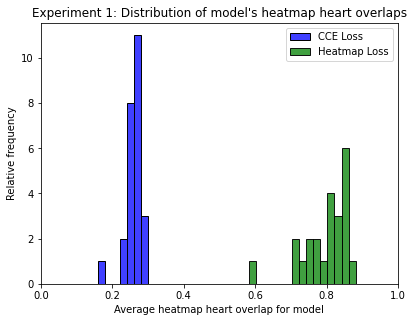

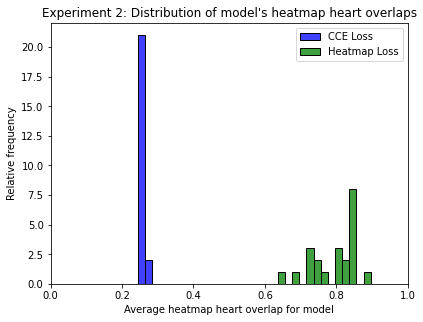

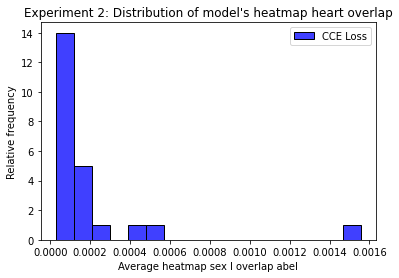

In [5]:
import seaborn as sns

print(len(exp11_heatmap_heart_overlaps))
plt.figure(figsize=(6.4, 4.8))
# sns.histplot(exp11_heatmap_heart_overlaps, binwidth = 0.02, bins = len(exp11_heatmap_heart_overlaps), color='blue')
# sns.histplot(exp12_heatmap_heart_overlaps, binwidth = 0.02,bins = len(exp12_heatmap_heart_overlaps), color='green')
sns.histplot(exp11_heatmap_heart_overlaps, color='blue', binwidth=0.02)
sns.histplot(exp12_heatmap_heart_overlaps, color='green', binwidth=0.02)
plt.title('Experiment 1: Distribution of model\'s heatmap heart overlaps')
plt.xlabel('Average heatmap heart overlap for model')
plt.ylabel('Relative frequency')
plt.legend(['CCE Loss', 'Heatmap Loss'])
plt.xlim([0, 1])
plt.show()

plt.figure(figsize=(6.4, 4.8))
# sns.histplot(exp21_heatmap_heart_overlaps, bins = len(exp21_heatmap_heart_overlaps), color='blue')
# sns.histplot(exp22_heatmap_heart_overlaps, bins = len(exp22_heatmap_heart_overlaps), color='green')

sns.histplot(exp21_heatmap_heart_overlaps, color='blue', binwidth=0.02)

sns.histplot(exp22_heatmap_heart_overlaps, color='green', binwidth=0.02)
plt.title('Experiment 2: Distribution of model\'s heatmap heart overlaps')
plt.xlabel('Average heatmap heart overlap for model')
plt.ylabel('Relative frequency')
plt.legend(['CCE Loss', 'Heatmap Loss'])
plt.xlim([0, 1])

plt.show()


sns.histplot(exp21_sex_label_overlaps, color='blue')
plt.title('Experiment 2: Distribution of model\'s heatmap heart overlap')
plt.xlabel('Average heatmap sex l overlap abel')
plt.ylabel('Relative frequency')
plt.legend(['CCE Loss', 'Heatmap Loss'])
plt.show()


# sns.histplot(exp22_sex_label_overlaps, color='green')
# plt.title('Experiment 2: Distribution of heatmap sex label overlap')
# plt.xlabel('Fraction of total heatmap overlapping with sex label')
# plt.ylabel('Relative frequency')
# plt.legend(['CCE Loss', 'Heatmap Loss'])
# plt.show()

In [6]:
import scipy
import pingouin as pg
print(scipy.stats.shapiro(exp11_heatmap_heart_overlaps))
print(scipy.stats.shapiro(exp12_heatmap_heart_overlaps))
print(scipy.stats.shapiro(exp21_heatmap_heart_overlaps))
print(scipy.stats.shapiro(exp22_heatmap_heart_overlaps))

print(pg.mwu(exp11_heatmap_heart_overlaps, exp12_heatmap_heart_overlaps ))
print(pg.compute_effsize(exp11_heatmap_heart_overlaps, exp12_heatmap_heart_overlaps))

print(pg.mwu(exp21_heatmap_heart_overlaps, exp22_heatmap_heart_overlaps ))
print(pg.compute_effsize(exp21_heatmap_heart_overlaps, exp22_heatmap_heart_overlaps))

print(pg.mwu(exp21_sex_label_overlaps, exp22_sex_label_overlaps ))
print(pg.compute_effsize(exp21_sex_label_overlaps, exp22_sex_label_overlaps ))

# print(scipy.stats.mannwhitneyu(exp11_heatmap_heart_overlaps, exp12_heatmap_heart_overlaps))
# print(scipy.stats.mannwhitneyu(exp21_heatmap_heart_overlaps, exp22_heatmap_heart_overlaps))
# print(scipy.stats.mannwhitneyu(exp21_sex_label_overlaps, exp22_sex_label_overlaps))



ShapiroResult(statistic=0.7644380331039429, pvalue=6.134605791885406e-05)
ShapiroResult(statistic=0.8519998788833618, pvalue=0.0029579810798168182)
ShapiroResult(statistic=0.9614484310150146, pvalue=0.4932354986667633)
ShapiroResult(statistic=0.8706158399581909, pvalue=0.008037474937736988)
     U-val alternative         p-val  RBC  CLES
MWU    0.0   two-sided  3.161517e-09  1.0   0.0
-10.77680309484483
     U-val alternative         p-val  RBC  CLES
MWU    0.0   two-sided  9.854764e-09  1.0   0.0
-11.876770018428248
     U-val alternative         p-val       RBC      CLES
MWU  483.0   two-sided  1.876752e-07 -0.909091  0.954545
-0.23965608162076996


# Removing outliers outside of 1.5 IQRs away from median

23
22
20
19
1.8364820167443334


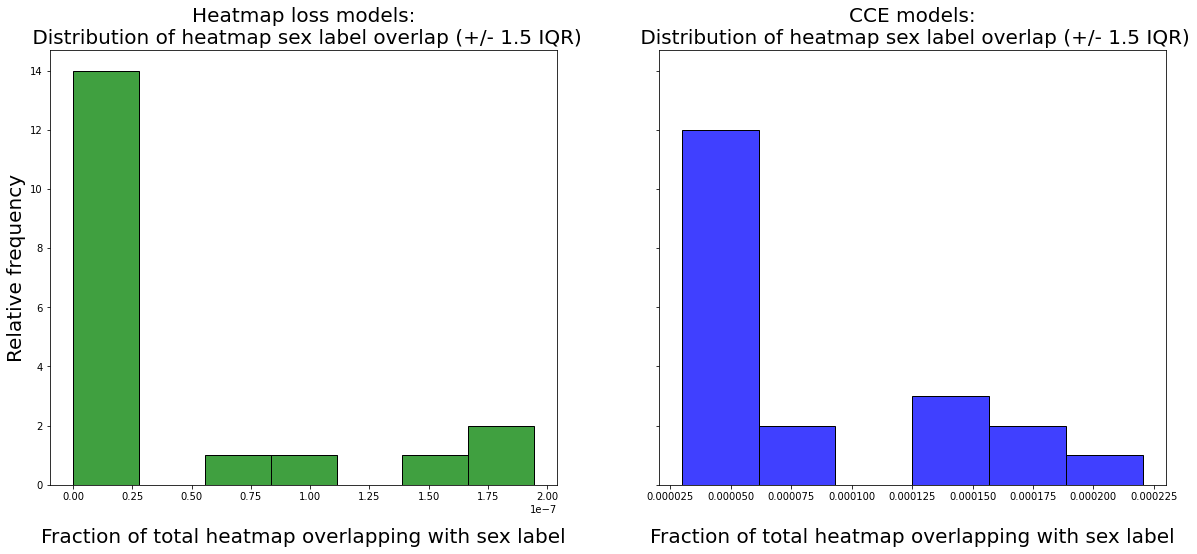

In [77]:
def find_outlier_bounds(list_of_vals):
  sorted(list_of_vals)
  q1, q3= np.percentile(list_of_vals,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 
  upper_bound = q3 + (1.5 * iqr) 
  return [lower_bound, upper_bound]

exp21_sex_label_overlaps_no_outliers = [el for el in exp21_sex_label_overlaps if find_outlier_bounds(exp21_sex_label_overlaps)[0] < el < find_outlier_bounds(exp21_sex_label_overlaps)[1]]
exp22_sex_label_overlaps_no_outliers = [el for el in exp22_sex_label_overlaps if find_outlier_bounds(exp22_sex_label_overlaps)[0] < el < find_outlier_bounds(exp22_sex_label_overlaps)[1]]

print(len(exp21_sex_label_overlaps))
print(len(exp22_sex_label_overlaps))

print(len(exp21_sex_label_overlaps_no_outliers))
print(len(exp22_sex_label_overlaps_no_outliers))

print(pg.compute_effsize(exp21_sex_label_overlaps_no_outliers, exp22_sex_label_overlaps_no_outliers))

fig, axes = plt.subplots(1,2, figsize=(20, 8), sharey=True)

sns.histplot(exp22_sex_label_overlaps_no_outliers, ax=axes[0], color='green')
axes[0].set_title('Heatmap loss models:\n Distribution of heatmap sex label overlap (+/- 1.5 IQR)', fontsize=20)
axes[0].set_xlabel('\nFraction of total heatmap overlapping with sex label', fontsize=20)
axes[0].set_ylabel('Relative frequency', fontsize=20)

sns.histplot(exp21_sex_label_overlaps_no_outliers, ax=axes[1], color='blue')
axes[1].set_title('CCE models:\n Distribution of heatmap sex label overlap (+/- 1.5 IQR)', fontsize=20)
axes[1].set_xlabel('\nFraction of total heatmap overlapping with sex label', fontsize=20)
axes[1].set_ylabel('Relative frequency', fontsize=20)

plt.show()

# Removing outliers outside of 5 IQRs away from median

23
22
22
21
1.2496963544569308


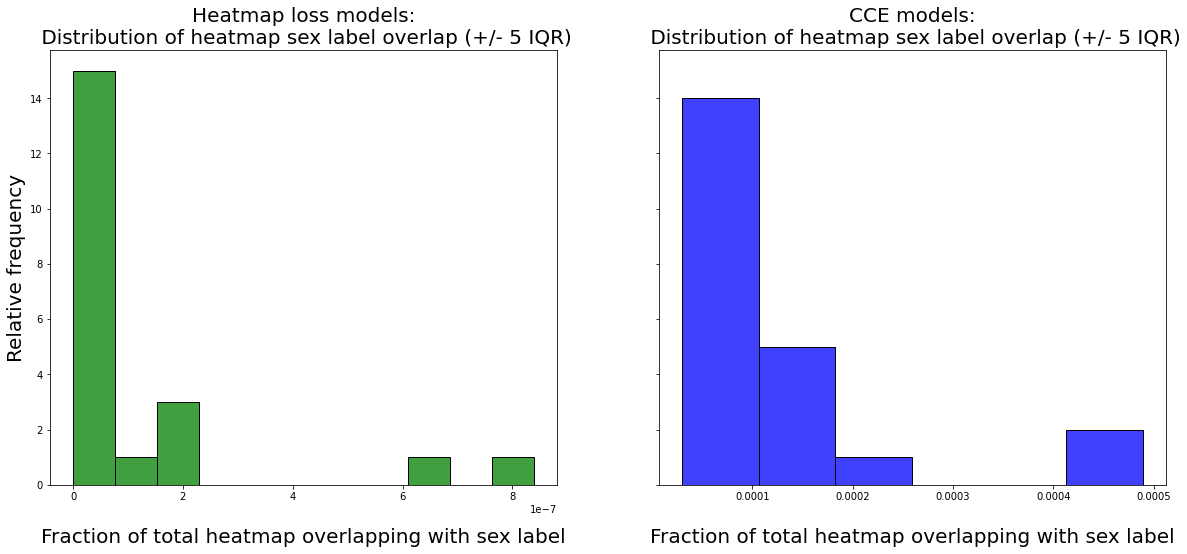

In [78]:
def find_outlier_bounds(list_of_vals):
  sorted(list_of_vals)
  q1, q3= np.percentile(list_of_vals,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (5 * iqr) 
  upper_bound = q3 + (5 * iqr) 
  return [lower_bound, upper_bound]

exp21_sex_label_overlaps_no_outliers = [el for el in exp21_sex_label_overlaps if find_outlier_bounds(exp21_sex_label_overlaps)[0] < el < find_outlier_bounds(exp21_sex_label_overlaps)[1]]
exp22_sex_label_overlaps_no_outliers = [el for el in exp22_sex_label_overlaps if find_outlier_bounds(exp22_sex_label_overlaps)[0] < el < find_outlier_bounds(exp22_sex_label_overlaps)[1]]

print(len(exp21_sex_label_overlaps))
print(len(exp22_sex_label_overlaps))

print(len(exp21_sex_label_overlaps_no_outliers))
print(len(exp22_sex_label_overlaps_no_outliers))

print(pg.compute_effsize(exp21_sex_label_overlaps_no_outliers, exp22_sex_label_overlaps_no_outliers))

fig, axes = plt.subplots(1,2, figsize=(20, 8), sharey=True)

sns.histplot(exp22_sex_label_overlaps_no_outliers, ax=axes[0], color='green')
axes[0].set_title('Heatmap loss models:\n Distribution of heatmap sex label overlap (+/- 5 IQR)', fontsize=20)
axes[0].set_xlabel('\nFraction of total heatmap overlapping with sex label', fontsize=20)
axes[0].set_ylabel('Relative frequency', fontsize=20)

sns.histplot(exp21_sex_label_overlaps_no_outliers, ax=axes[1], color='blue')
axes[1].set_title('CCE models:\n Distribution of heatmap sex label overlap (+/- 5 IQR)', fontsize=20)
axes[1].set_xlabel('\nFraction of total heatmap overlapping with sex label', fontsize=20)
axes[1].set_ylabel('Relative frequency', fontsize=20)

plt.show()